# Python Bootcamp Day 4 Morning

* Instructor:  Andrew Yarmola [andrew.yarmola@gmail.com](mailto:andrew.yarmola@gmail.com)
* Bootcamp files: [github.com/andrew-yarmola/python-bootcamp](https://github.com/andrew-yarmola/python-bootcamp)

## Comments

### References in Swagger specification files

One can use references inside `swagger.yml` files used by `connexion` to eliminate repetition. For example,

```yml
paths:
...
  /employee/{employee_id}:
    get:
      operationId: employee.read_one
      tags:
        - Employee
      summary: Read one employee
      description: Read one employee
      parameters:
        - $ref: '#/parameters/employee_id'
      responses:
        200:
          description: Successfully read employee from employee data operation
          schema:
              $ref: '#/definitions/employee'
...
parameters:
  employee_id:
    name: employee_id
    description: Employees's unique identifier
    in: path
    type: string
    required: true
    pattern: "^[0-9]+$"
  employee:
    name: employee
    in: body
    description: Employee to create or update
    required: True
    schema:
      type: object
      properties:
        name:
          type: string
          pattern: "^[a-zA-Z\\s]*$"
          description: Name of employee to create or update
          minLength: 1
          maxLength: 100

definitions:
  employee:
    type: object
    required:
      - name
    properties:
      employee_id:
        type: string
        description: Unique identifier
        example: "123"
        readOnly: true
      name:
        type: string
        description: Employee's name
        example: "Susie Andrews"
        minLength: 1
        maxLength: 100
      age:
        type: string
        description: Employee's age
        example: "35"
        minLength: 1
      monthly_salary:
        type: string
        description: Employee's monthly salary
        example: "23124.53"
        minLength: 1
      timestamp:
        type: string
        format: date-time
        description: Creation or update time
        example: "2015-07-07T15:49:51.230+02:00"
        readOnly: true
```

Notice the extra properties such as `readOnly`, `minLength`, and most interesting of all `pattern`, which applies a regular expression to verify input well before it hits your python code!

**Note**. As far as I can tell, for `json` output, the only `type` options are `object`, `array`, `string`, `integer`, `number`.

You can read the full Swagger/OpenAPI spec at [swagger.io/specification/](https://swagger.io/specification/).

See the `challenges/day-3/solutions/dummy-with-connexion` app for the full example.

## Introduction to data processing libraries

The data processing/data mining toolchain is composed of the top level `numpy`, `scipy`, and `scikit-learn` frameworks. The two most important data organizing frameworks are `numpy`, which works with `arrays`, and `pandas`, which works with `DataFrame` and `Series`. There is also the `sympy` framework that does symbolic computations and `pymc3` for statical distributions.

For graphing and plotting, there are `matplotlib` and  `seaborn`, both of which are great.

In our repository, we now have a new `jupyterlab` project and `data_mining` projects, the later of which contains a `Pipfile` with all the data processing libraries of interest.

```bash
# install jupyter lab
cd jupyterlab
pipenv sync
./install_extensions

# install data mining libraries
cd ../data_mining
pipenv sync --dev
./install_kernel data_mining

# launch jupyter lab
cd ../jupyterlab
pipenv shell
$ cd .. # or wherever you want the root of juputer to be
$ jupyter lab
```

You should now be able to start new notebooks with the `data_mining` kernel or switch kernels in the `Kernel -> Change Kernel` menu item.

# `numpy`

`numpy` is a python package that focuses on multi-dimensional arrays, scientific computation, and high efficiency. Combined with `scipy`, `sympy`, and graphing modules, one can use python in highly customizable scientific computing.

## `array` object

`numpy` is known for **array oriented computing**. An `array` is a mutli-dimensional table (in dimension 2, you can think of an `array` as a matrix.

In [1]:
import numpy as np

# we can make an array from a list of lists
a = np.array([[0,1,2],[3,4,5]]) # 2-d
b = np.array([[[0,1],[2,3]],[[4,5],[6,7]]]) # 3-d

In [2]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
b

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [4]:
a.ndim

2

In [5]:
b.ndim

3

In [6]:
a.shape

(2, 3)

In [7]:
b.shape

(2, 2, 2)

### Basic indexing, assignment, and copies

To get values out of an array, we use the syntax `array[p_1,p_2,p_3,...]` where `p_i` is the index in that dimension (also known as **axis**) starting with zero.

In [8]:
b[1,1,0]

6

In [9]:
print("a = \n", repr(a))

a[1,1] = 29

print("a = \n", repr(a))

a =  array([[0, 1, 2],
       [3, 4, 5]])
a =  array([[ 0,  1,  2],
       [ 3, 29,  5]])


In [10]:
# make a copy of a
c = a.copy()
c[0,0] = 9
print("c = \n", repr(c))

c =  array([[ 9,  1,  2],
       [ 3, 29,  5]])


We will look at array slicing in a bit.

### Getting help

Along with the standrad `help()` and `?` methods of looking up documentation in `ipython`, we can also search the documentation using `numpy.lookfor()`. This can be useful if you can't quite remember the exact name of a command.

In [11]:
np.lookfor('evenly spaced values')

Search results for 'evenly spaced values'
-----------------------------------------
numpy.arange
    Return evenly spaced values within a given interval.
numpy.ma.arange
    Return evenly spaced values within a given interval.
numpy.logspace
    Return numbers spaced evenly on a log scale.
numpy.geomspace
    Return numbers spaced evenly on a log scale (a geometric progression).
numpy.trapz
    Integrate along the given axis using the composite trapezoidal rule.
numpy.gradient
    Return the gradient of an N-dimensional array.


### Efficiency

At first glance, `arrays` look just like lists of lists, however, they are **much more efficient** (for certain tasks)

In [12]:
# we can time basic creation
%timeit list(range(1000))

22.1 µs ± 934 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
# `numpy` not only creates faster, it can be smart
%timeit np.arange(1000)

1.4 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [14]:
# operations are even slower
%timeit [i**2 for i in range(1000)]

397 µs ± 4.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
# squares are even slower
%timeit np.arange(1000)**2

3.2 µs ± 51.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Creating `arrays`

As we just saw above, it is much faster to create arrays directly than to turn lists into arrays. `numpy` has many build in methods for array creation. Here are a few :

In [16]:
# evenly spaced
a = np.arange(2,10,0.2)
print("a = \n", repr(a))

a =  array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4,
       4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ,
       7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6,
       9.8])


In [17]:
# evenly spaced by number of points
a = np.linspace(2,7,20)
print("a = \n", repr(a))

a =  array([2.        , 2.26315789, 2.52631579, 2.78947368, 3.05263158,
       3.31578947, 3.57894737, 3.84210526, 4.10526316, 4.36842105,
       4.63157895, 4.89473684, 5.15789474, 5.42105263, 5.68421053,
       5.94736842, 6.21052632, 6.47368421, 6.73684211, 7.        ])


In [18]:
# zeros of a given shape
a = np.zeros((4,2,3))
print("a = \n", repr(a))

a =  array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])


In [19]:
# ones of a given shape
a = np.ones((2,3,4))
print("a = \n", repr(a))

a =  array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])


In [20]:
# identity matrix
a = np.eye(4)
print("a = \n", repr(a))

a =  array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])


In [21]:
# diagonal matrix
d = np.linspace(0,1,4)
a = np.diag(d) # the argument can be any iterable
print("a = \n", repr(a))

a =  array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])


In [22]:
# random arrays
# uniform in [0,1]
a = np.random.rand(2,3)
print("a = \n", repr(a))

a =  array([[0.95142958, 0.90981572, 0.72606823],
       [0.40199748, 0.87979674, 0.71788661]])


In [23]:
shape = (2,1,3)
# standard normal distribution (Gaussian)
a = np.random.randn(*shape)
print("a = \n", repr(a))

a =  array([[[-0.97072944,  0.75714808,  0.08043435]],

       [[ 0.31531926,  0.54094378, -1.12844573]]])


**Remark.** `numpy.random` has a **much better** random number generator than `random`

If you every need to **preallocate** space for an array quickly and with **arbitrary** (but not random) values, you can use `numpy.empty`

In [24]:
# "empty" array of a given shape
a = np.empty((3,1,4))
print("a = \n", repr(a))

a =  array([[[ 0.        ,  0.78240057,  0.        ,  0.96421276]],

       [[-0.        , -0.57474687,  0.        ,  0.75241992]],

       [[ 0.        ,  0.97106245, -0.        , -0.98928383]]])


**Warning.** You have no guarantee about the values of `numpy.empty`

In [25]:
# "empty" array of another array
b = np.empty_like(a)
print("b = \n", repr(b))

b =  array([[[ 0.        ,  0.78240057,  0.        ,  0.96421276]],

       [[-0.        , -0.57474687,  0.        ,  0.75241992]],

       [[ 0.        ,  0.97106245, -0.        , -0.98928383]]])


**Remark**. Note that most methods take a `shape` as a tuple, however, some methods such as `numpy.random.randint` expect the `shape` as positional arguments.

### Data types

Unlike python `lists` (or lists of lists), `numpy` `arrays` can **only store one type of value** at a time. Here is an example :

In [26]:
a = np.arange(4)
print("a = \n", repr(a))

a =  array([0, 1, 2, 3])


In [27]:
a[2] = 5 # change value at 2
print("a = \n", repr(a))

a =  array([0, 1, 5, 3])


In [28]:
a[1] = 7.6 # try to set a float
print("a = \n", repr(a))

a =  array([0, 7, 5, 3])


From these examples, we can see the following things :
   * arrays are mutable types
   * for 1-dim arrays, we can access just like a list (more on this alter)
   * **when we tried to set a `float` for `a[1]`, the array turned it into an `int`**

Why did this happen? It turns out that when our array was created, its data type (`dtype`) was set to being an integer.

In [29]:
a.dtype

dtype('int64')

In [30]:
b = np.array([1.,2.,3.,4.])
b.dtype

dtype('float64')

In [40]:
c = np.array('a list of words'.split())
print(c)
c.dtype 

['a' 'list' 'of' 'words']


dtype('<U5')

**Remark**. Above, `'int64'` means integer using at most `64` bits. The `'<U5'` type stands for 5 or less **unicode** characters.

In [41]:
# the type won't change when I set a value
c[0] = 'something'
print("c = \n", repr(c))

c =  array(['somet', 'list', 'of', 'words'], dtype='<U5')


In [42]:
# a copy with different type
d = c.astype('<U10')
print("d = \n", repr(d))

d[0] = 'something'
print("d = \n", repr(d))

d =  array(['somet', 'list', 'of', 'words'], dtype='<U10')
d =  array(['something', 'list', 'of', 'words'], dtype='<U10')


### Structured data types

If you want to store types a little more complicate than just strings, integers, floating point and complex numbers, you can use **structured data types**

In [45]:
samples = np.array([('ALFA',1,0.37),
                    ('BETA',2,0.11),
                    ('TAU',1,0.13)])
print(samples.shape)
print(repr(samples))

(3, 3)
array([['ALFA', '1', '0.37'],
       ['BETA', '2', '0.11'],
       ['TAU', '1', '0.13']], dtype='<U4')


In [46]:
# data type spec
t = np.dtype([('sensor_code', '<U4'),
              ('position', 'int64'),
              ('value', 'float64')])

In [47]:
samples = np.array([[('ALFA',1,0.37)],
                    [('BETA',2,0.11)],
                    [('TAU',1,0.13)]], dtype=t)
print(samples.shape)
print(repr(samples))

(3, 1)
array([[('ALFA', 1, 0.37)],
       [('BETA', 2, 0.11)],
       [('TAU', 1, 0.13)]],
      dtype=[('sensor_code', '<U4'), ('position', '<i8'), ('value', '<f8')])


In [48]:
# we can use the type name to
# get a nice subarray
samples['sensor_code']

array([['ALFA'],
       ['BETA'],
       ['TAU']], dtype='<U4')

In [49]:
# we can also make assignemtns
samples[0]['sensor_code'] = 'XI'
print(repr(samples))

array([[('XI', 1, 0.37)],
       [('BETA', 2, 0.11)],
       [('TAU', 1, 0.13)]],
      dtype=[('sensor_code', '<U4'), ('position', '<i8'), ('value', '<f8')])


**Remark**. It is possible to write your own classes that can be used as data types for `numpy` arrays.

### Basic operatons

`numpy.array` behaves **very differently** from python `list` when it comes to binary operations such as `+,-,*,/,**,%, ==, <, >, etc`. All of the standard operations are **element-wise**

In [125]:
a = np.array([[1,-1,2],[3,4,5]])
b = np.array([[3,0,6],[6,4,5]])
print("a = \n", repr(a))
print("b = \n", repr(b))

a =  array([[ 1, -1,  2],
       [ 3,  4,  5]])
b =  array([[3, 0, 6],
       [6, 4, 5]])


In [109]:
# element-wise addition 
a+b

array([[ 4,  0,  8],
       [ 9,  8, 10]])

In [110]:
# element-wise multiplication 
a*b

array([[ 3,  0, 12],
       [18, 16, 25]])

**Warning**. For 2-dim arrays, `a*b` **is not matrix multiplication**! To multiply matrices, use `a.dot(b)`.

In [111]:
# element-wise division 
(b*a+a)/a

array([[ 4., nan,  7.],
       [ 7.,  5.,  6.]])

In [112]:
# element-wise exp
a**b

array([[   1,    1,   64],
       [ 729,  256, 3125]])

In [113]:
# elemnt-wise remainder
a % b

array([[1, 0, 2],
       [3, 0, 0]])

For operations with integers and floats everything is still element-wise

In [114]:
print("a = \n", repr(a), a.dtype)
print("a = \n", repr(a + 1.5), a.dtype)

a =  array([[1, 0, 2],
       [3, 4, 5]]) int64
a =  array([[2.5, 1.5, 3.5],
       [4.5, 5.5, 6.5]]) int64


In [115]:
3/a

array([[3.  ,  inf, 1.5 ],
       [1.  , 0.75, 0.6 ]])

In [116]:
a**2

array([[ 1,  0,  4],
       [ 9, 16, 25]])

In [117]:
a % 3

array([[1, 0, 2],
       [0, 1, 2]])

You can also do **sums**  and **products** of all elements of just along an axis. You can use both `numpy.prod()` and` numpy.sum()` functions or use instance methods `.prod()` and `.sum()`.

In [118]:
# sum all elements
print(np.sum(a))

# product of all elements
print(a.prod())

15
0


In [119]:
# sum along the 0-axis (rows)
print(a)
a.sum(axis = 1)

[[1 0 2]
 [3 4 5]]


array([ 3, 12])

In [120]:
# product along the 1-axis (cols)
np.prod(a, axis = 1)

array([ 0, 60])

**Comparisons are also element-wise**

In [121]:
a == 5

array([[False, False, False],
       [False, False,  True]])

In [122]:
a > 3

array([[False, False, False],
       [False,  True,  True]])

In [103]:
# element-wise comaprison
a == b

array([[False, False, False],
       [False,  True,  True]])

In [104]:
b < a

array([[False, False, False],
       [False, False, False]])

In [105]:
# to check if arrays are equal
np.array_equal(a,b)

False

To check if all elements of a boolean array are `True`, you can use either `numpy.all()` or the `.all()` instance method. Similar for `any`.

In [86]:
c = (a <= a**b)
c.all()

True

### Vectorized functions and vectorization

Most mathematical functions implemented in `numpy` act element-wise on arrays. Vectorization is the process of turning a function into one that works element-wise on arrays. For example,

In [157]:
np.seterr(all='warn')

print("a = \n", repr(a))
np.log(a)

a = 
 array([[0, 1, 2, 3]])


/Users/yarmola/.local/share/virtualenvs/data_mining-xIzjQ1YQ/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


array([[      -inf, 0.        , 0.69314718, 1.09861229]])

**Remark** You can catch such warnings if you need.

In [132]:
import warnings
with warnings.catch_warnings() :
    warnings.filterwarnings('error')
    try :
        np.log(a)
    except Warning as warn : # <--- get access to the warning or exception object
        print(type(warn))
        print(f"Warning: {warn}")

<class 'RuntimeWarning'>


Back to vectorization. You can create your own element-wise functions by using `numpy.vectorize`. Here are some examples

In [134]:
# bad inv
def bad_inv(x) :
    if x < 1 : return x**3
    else : return 1/x

In [135]:
bad_inv(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [136]:
# vectorize
v_bad_inv = np.vectorize(bad_inv)
v_bad_inv(a)

array([[ 1.        , -1.        ,  0.5       ],
       [ 0.33333333,  0.25      ,  0.2       ]])

In [137]:
# a two parameter example
def silly_sum(x,y) :
    if x < y : return x + 2*y
    else : return x - 17*y
        
v_silly_sum = np.vectorize(silly_sum)
v_silly_sum(b,a)

array([[-14,  17, -28],
       [-45, -64, -80]])

In [138]:
# vectorizing and partials
from functools import partial
def on_ec(a,b,x,y) :
    return y**2 == x**3 + a*x + b
        
v_on_ec = np.vectorize(partial(on_ec,1,1))
v_on_ec(b,a)

array([[False,  True, False],
       [False, False, False]])

### Broadcasting

`numpy` is very clever about how it perfoms binary operations on arrays of difference shapes and dimenions. Here is an example :

In [140]:
a = np.ones((3,3))
b = np.array([2,3,4])
print("a = \n", repr(a), " of shape ", a.shape)
print("b = \n", repr(b), " of shape ", b.shape)
print('+'*25)
print(repr(a+b))

a =  array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])  of shape  (3, 3)
b =  array([2, 3, 4])  of shape  (3,)
+++++++++++++++++++++++++
array([[3., 4., 5.],
       [3., 4., 5.],
       [3., 4., 5.]])


**Broadcasting** describes how `numpy` works with arrays of different shapes during arithmetic operation. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

<img src="numpy_broadcasting.png" width=100%>

### How broadcasting works

When operating on two arrays `a` and `b`, `numpy` compares their shape tuples for compatibility. Let `a.shape = ` $(s_n,s_{n-1},...,s_0)$ and `b.shape =` $(t_m,t_{m-1},...,t_0)$. We set $k = max(m,n)$ and if $n < m$, set $s_{n+j} = 1$ or if $m > n$, set $t_{m+j} = 1$ for $1 \leq j \leq |m-n|$. We call this **padding** a shape on the left.

The (padded) shapes are **compatible** if for all $0 \leq i \leq k$ one has
   * $s_i = t_i$ **or**
   * one of $s_i, t_i$ is equal to $1$.
   
**Notice that we compare from right to left.**

Once the shapes are deemed compatible, `numpy` **broadcasts** each array as follows :
* if $s_i = 1 < t_i$, then `numpy` makes $t_i$ copies of `a` and **stacks** them along the axis for $s_i$.
* similarly for `b` wherever $b_i = 1$.

Once each array has been broadcasts, they both have the shape $(\max(s_k,t_k),..., \max(s_0,t_0))$.

For example,

In [154]:
a = np.array([[0,1,2,3]])
b = np.array([[4],[7],[9]])
print("a = \n", repr(a))
print("b = \n", repr(b))

a = 
 array([[0, 1, 2, 3]])
b = 
 array([[4],
       [7],
       [9]])


In [158]:
print(a.shape)
print(b.shape)

(1, 4)
(3, 1)


We now pad `a.shape` on the left to obtain 
```
a.shape = (1,4)
b.shape = (3,1)
```
We then take $3$ copies of `a` and stack them along the $0$-axis (rows) and $4$ copies of `b` and stack them along the $1$-axis (columns). See the image above.

In [156]:
c = a*b
print("c = \n", repr(c))
print(c.shape)

c = 
 array([[ 0,  4,  8, 12],
       [ 0,  7, 14, 21],
       [ 0,  9, 18, 27]])
(3, 4)


**Remark :** Your vectorized functions will work with broadcasting!

In [159]:
v_silly_sum(a,b)

array([[ 8,  9, 10, 11],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

### Repeat, tile, broadcast_to, and kron

There are several ways of using the data from an array to create new arrays by repetition.
   * `np.broadcast_to(A, new_shape)` for a **compatible** shape, this returns a **readonly** version of `A` broadcast to a new shape

In [163]:
print("a = \n", repr(a))

x = np.broadcast_to(a,(2,4))

print("x = \n",repr(x))

a = 
 array([[8878,    1,    2,    3]])
x = 
 array([[8878,    1,    2,    3],
       [8878,    1,    2,    3]])


   * `np.repeat(A, repeats, axis = axis_num)` returns a new array with entries of `A` repeated along the axis `axis_num` according to the contents of `repeats`
      * `repeats` is an int or array of ints giving the number of repetitions for each element on the axis

In [165]:
print("c = \n", repr(c))

y = np.repeat(c, 2, axis = 1)

print(repr(y))

c = 
 array([[ 0,  4,  8, 12],
       [ 0,  7, 14, 21],
       [ 0,  9, 18, 27]])
array([[ 0,  0,  4,  4,  8,  8, 12, 12],
       [ 0,  0,  7,  7, 14, 14, 21, 21],
       [ 0,  0,  9,  9, 18, 18, 27, 27]])


In [167]:
# notice the 0 in [0,3,1] makes that
# row vanish
z = np.repeat(c, [5,3,1], axis = 0)
print(repr(z))

array([[ 0,  4,  8, 12],
       [ 0,  4,  8, 12],
       [ 0,  4,  8, 12],
       [ 0,  4,  8, 12],
       [ 0,  4,  8, 12],
       [ 0,  7, 14, 21],
       [ 0,  7, 14, 21],
       [ 0,  7, 14, 21],
       [ 0,  9, 18, 27]])


 * `numpy.tile(A, reps)` construct an array by repeating `A` the number of times given by `reps` in each dimension/axis.
      * `reps` is an **list**/array giving the number of repetitions of A along each axis.
      * if `reps` has length `d`, the result will have dimension of `max(d, A.ndim)`.
      * if `A.ndim < d,` A is promoted to be d-dimensional by prepending new axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication, or shape (1, 1, 3) for 3-D replication.
      * if A.ndim > d, `reps` is promoted to length `A.ndim` by prepending 1’s to it. Thus for an `A` of shape `(2, 3, 4, 5)`, a reps of `(2, 2)` is treated as `(1, 1, 2, 2)`.

In [170]:
print("b = \n", repr(b))

# double the rows and
# triple the columns
q = np.tile(b,(2,3))

print("b = \n", repr(q))

b = 
 array([[4],
       [7],
       [9]])
array([[4, 4, 4],
       [7, 7, 7],
       [9, 9, 9],
       [4, 4, 4],
       [7, 7, 7],
       [9, 9, 9]])


   * `numpy.kron(a,b)` returns the **Kronecker product** :  a composite array made of blocks of the second array scaled by the first.
      * for 2-dim you get something like :
      ```
      [[ a[0,0]*b,   a[0,1]*b,  ... , a[0,-1]*b  ],
      [  ...                              ...   ],
      [ a[-1,0]*b,  a[-1,1]*b, ... , a[-1,-1]*b ]]
      ```

In [172]:
p = np.array([[1,3],[5,4]])
d = np.diag([1,2,3])
print("b = \n", p)
print("b = \n", d)


r = np.kron(d, p)

print("r = \n", repr(r))

b = 
 [[1 3]
 [5 4]]
b = 
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
r = 
 array([[ 1,  3,  0,  0,  0,  0],
       [ 5,  4,  0,  0,  0,  0],
       [ 0,  0,  2,  6,  0,  0],
       [ 0,  0, 10,  8,  0,  0],
       [ 0,  0,  0,  0,  3,  9],
       [ 0,  0,  0,  0, 15, 12]])


### Reshaping

#### `ravel`
It is possible reshape array data to your liking. For example, you can **(un)`ravel`** (or **flatten**) a multi-dimensional array into a one dimensional array. Similar to how you would read off the entries of a matrix.

In [173]:
p = np.array([[1,2,3],[4,5,6]]) + np.array([[[0]],[[6]]])
print(repr(p))
# read off the entries in lexographic order
r = p.ravel()
print("r = \n", repr(r))

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])
r = 
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


The order here is **lexographic order** on the indices. In the above example, the order is
```
(0,0,0)
(0,0,1)
(0,0,2)
(0,1,0)
(0,1,1)
...
```

#### `reshape`
You can **reshape** an `array` by using
   * `A.reshape(new_shape)`
   * `numpy.reshape(A, new_shape)`

Note that `np.prod(A.shape)` must equal to `np.prod(new_shape)`. Both of there methods **return a "new" array object**.

In [174]:
p.reshape((3,1,4))

array([[[ 1,  2,  3,  4]],

       [[ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12]]])

Think of the above operation as **unraveling followed by placing the entries into the new shape in order**.

You can have `numpy` **intuit the rest of `new_shape`** by terminating the shape with `-1`

In [175]:
p.reshape((4,-1))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

#### `resize`

You can also `resize` arrays, which means to reshape **and** either truncate or pad the entries as necessary. There are two **different** methods for doing this.

* `numpy.resize(A, new_shape)` returns a **new** array made by unraveling `A` and filling `new_shape` by **repeatedly cycling through A if necessary**.

In [176]:
print(repr(p))
np.resize(p,(2,3))

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])


array([[1, 2, 3],
       [4, 5, 6]])

In [177]:
np.resize(p,(3,10))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6]])

* `A.resize(new_shape)` **updates** the contents of `A` to reflect the `new_shape`. If there is not enough entries in `A`, **pads all extra with zero**.

In [178]:
print("b = \n", repr(b))
b.resize(4,4)
print("b = \n", repr(b))

b = 
 array([[4],
       [7],
       [9]])
b = 
 array([[4, 7, 9, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])


**Warning**. As we will mention in the next section, `numpy` `arrays` don't always **own** their data. `A.resize()` only works for arrays that manage their own data and aren't **views** into other arrays.

### Dimension shuffling

If you want to shuffle the dimensions of your array (i.e. change which axis is which) you can use **`A.transpose`** as follows

In [184]:
# note, you can specify the shape
# to reshape as a tuple, or arguments
a = np.arange(3*2*4).reshape(3,2,4)
print("a = \n", repr(a))

a = 
 array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])


In [185]:
# tranpose using a permutation of
# of the axis indexes
b = a.transpose(1,2,0)
print("b = \n", repr(b))

b = 
 array([[[ 0,  8, 16],
        [ 1,  9, 17],
        [ 2, 10, 18],
        [ 3, 11, 19]],

       [[ 4, 12, 20],
        [ 5, 13, 21],
        [ 6, 14, 22],
        [ 7, 15, 23]]])


The short-hand for the **reversed** permutation $(0,1,2, \ldots,n) \mapsto (n, n-1, \ldots, 0)$ is given by `A.T` or `A.transpose()` with no arguments.

In [186]:
a = np.arange(2*2).reshape(2,2)
print("a = \n", repr(a))
print(repr(a.T))

a = 
 array([[0, 1],
       [2, 3]])
array([[0, 2],
       [1, 3]])


For matrices, this is the usual transpose from linear algebra.

### Slicing and views

One can **slice** arrays in a very similar manner to python lists by using 

`A[start_0 : end_0 : step_0, start_1 : end_1, step_1, ... ]`.

<img src="numpy_indexing.png" width=100%>


For example :

In [228]:
a = np.arange(4*4).reshape(4,4)
print("a = \n", repr(a))
# just like with lists, we don't
# need to include start, end, or step
b = a[0:2,2:]
print("b = \n", repr(b))

a = 
 array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
b = 
 array([[2, 3],
       [6, 7]])


In [188]:
b = a[::2,::3]
print("b = \n", repr(b))

b = 
 array([[ 0,  3],
       [ 8, 11]])


**Important** The arrays returned by a slice are **views** into the **data of the original**. Thus, if you **modify the data in a view you modify the original data!**

In [189]:
b[0,0] = 17
print("b = \n", repr(b))
print("a = \n", repr(a))

b = 
 array([[17,  3],
       [ 8, 11]])
a = 
 array([[17,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])


**Important**. **A lot of other operations (such as broadcast) also share the data with the original!** If you need to modify something, but you aren't sure if data is shared you can check with `numpy.may_share_memory(a,b)`

In [190]:
np.may_share_memory(a,b)

True

or you can always just **make a copy** (though you may not want to for efficiency reasons.)

In [191]:
c = b.copy()
np.may_share_memory(a,c)

False

### Assigning several values at once

You can use a view to assign a bunch of values at once :

In [211]:
print("a = \n", repr(a))
b = a[::2,::3]
# assign all the same
b[:] = -75
print("a = \n", repr(a))

a = 
 array([[ 0,  1,  0,  0],
       [ 4,  5,  0,  0],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
a = 
 array([[-75,   1,   0, -75],
       [  4,   5,   0,   0],
       [-75,   9,  10, -75],
       [ 12,  13,  14,  15]])


In [212]:
# assign from another array
b[:,:] = np.zeros((2,2))
print("a = \n", repr(a))

a = 
 array([[ 0,  1,  0,  0],
       [ 4,  5,  0,  0],
       [ 0,  9, 10,  0],
       [12, 13, 14, 15]])


In [222]:
# assign using broadcasing
b[1,:] = np.array([57989,180])
print("a = \n", repr(a))

a = 
 array([[    0,     1, 57989,     3],
       [    4,     5, 57989,   180],
       [    8,     9,    10,    11],
       [   12,    13,    14,    15]])


## Fancy indexing

You can also do some fancy indexing with `numpy.array` that goes beyond slicing. However, **fancy indexing returns copies not views**.

### using tuples

We can give coordinates for each axis as tuples or lists.

For example,

In [227]:
print("a = \n", repr(a))

b = a[(1,3,0),(0,2,0)]

print("b = \n", repr(b))

a[(1,3),(0,2)] = 8900

print("a = \n", repr(a))

a = 
 array([[   0,    1,    2,    3],
       [8900,    5,    6,    7],
       [   8,    9,   10,   11],
       [  12,   13, 8900,   15]])
b = 
 array([8900, 8900,    0])
a = 
 array([[   0,    1,    2,    3],
       [8900,    5,    6,    7],
       [   8,    9,   10,   11],
       [  12,   13, 8900,   15]])


Here is a nice image from our text

<img src="numpy_fancy_indexing.png" width=100%>

### masks or boolean arrays

You can also specify a **boolean array** as the indexes you want as you can see in the image above. Another good example is :

In [229]:
# this is called a boolean mask
t = (a % 3 == 2)
print(repr(t))

array([[False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False,  True],
       [False, False,  True, False]])


In [230]:
print("a = \n", repr(a))

b = a[t]

print("b = \n", repr(b))

# you can also use
# a[a % 3 == 2] = 7700

a[t] = 7700

print("a = \n", repr(a))

a = 
 array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
b = 
 array([ 2,  5,  8, 11, 14])
a = 
 array([[   0,    1, 7700,    3],
       [   4, 7700,    6,    7],
       [7700,    9,   10, 7700],
       [  12,   13, 7700,   15]])


**Remark** Note that `a[(1,2)]` and `a[(1,2),]` are different!

In [232]:
# same as a[1,2]
a[(1,2)]

6

In [233]:
print("a = \n", repr(a))
# same as a[(1,2),...]
a[(1,3),]

a = 
 array([[   0,    1, 7700,    3],
       [   4, 7700,    6,    7],
       [7700,    9,   10, 7700],
       [  12,   13, 7700,   15]])


array([[   4, 7700,    6,    7],
       [  12,   13, 7700,   15]])

### mixing fancy and normal sclicing

Notice that we can do the following

In [234]:
print("a = \n", repr(a))
a[2:,(1,3)]

a = 
 array([[   0,    1, 7700,    3],
       [   4, 7700,    6,    7],
       [7700,    9,   10, 7700],
       [  12,   13, 7700,   15]])


array([[   9, 7700],
       [  13,   15]])

### Controlling the shape of array returned by fancy indexing

For fancy slicing, you can acutally give **arrays** as your indexing set :

In [235]:
print("a = \n", repr(a))

# a (3,1) array
rows = np.array([[0],[1],[3]])
# a (1,3 array)
cols = np.array([2,3])

b = a[rows, cols]
print("b = \n", repr(b))

a = 
 array([[   0,    1, 7700,    3],
       [   4, 7700,    6,    7],
       [7700,    9,   10, 7700],
       [  12,   13, 7700,   15]])
b = 
 array([[7700,    3],
       [   6,    7],
       [7700,   15]])


In [236]:
np.may_share_memory(a,b)

False

In essense, `numpy` will boradcast your indexing specification.

### Named slices and special symbols

Since slicing can get complicated, we can separate slicing construction and actually taking a slice of an array.

The syntax `start:stop:step` is equivalnet to `slice(start,stop,step)`

In [237]:
x_slice = slice(None,3,2)
y_slice = slice(3,1,-1)

print("a = \n", repr(a))

b = a[x_slice, y_slice]

print("b = \n", repr(b))

a = 
 array([[   0,    1, 7700,    3],
       [   4, 7700,    6,    7],
       [7700,    9,   10, 7700],
       [  12,   13, 7700,   15]])
b = 
 array([[   3, 7700],
       [7700,   10]])


The symbol `:` is equivalent to `slice(None, None, None)`. So, for example, to get a "layer" of a 3 dimensional array we can do :

In [238]:
a = np.arange(4*3*2).reshape(2,3,4)
all_slice = slice(None, None, None)

print("a =", repr(a))

b = a[:,1,:]

t = (all_slice, 1, all_slice)

c = a[t]

print("b = \n", repr(b))
print("c = \n", repr(c))

a = array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])
b = 
 array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])
c = 
 array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])


The advantage of this, is that `slice` can be used to consturct things **dynamically**. For example, if I want a layer form a specific axis :

In [239]:
def layer(array, axis = 0, idx = 0) :
    """ Returns array[:,:,...., idx, :, :, ....] where idx is in
    axis position specified. """
    all_slice = slice(None, None, None)
    t = (all_slice,) * axis + (idx,) + (all_slice,)*(array.ndim - axis - 1)
    return array[t]

In [240]:
layer(a,1,2)

array([[ 8,  9, 10, 11],
       [20, 21, 22, 23]])

### special symbol ...

The **ellipsis** (`...`) can be used **once** when slicing an array to **fill** the appropirate number of `:`. For example :

In [ ]:
b = a[...,2]

c = a[:,:,2]

print("b = \n", repr(b))
print("c = \n", repr(c))

### new axis

Sometimes it is very useful to insert a new axis into your array. This can be accomplished using `numpy.newaxis`

In [241]:
a = np.arange(4)
print("a = \n", repr(a))
print(a.shape)

a = 
 array([0, 1, 2, 3])
(4,)


In [245]:
b = a[:,np.newaxis]

print("b = \n", repr(b))
print(b.shape)

b = 
 array([[0],
       [1],
       [2],
       [3]])
(4, 1)


In [ ]:
a = np.arange(4*3*2).reshape(2,3,4)
print(a.shape)
b = a[:,np.newaxis,...]
print(b.shape)

**Takeaway**. If you think you should be able to slice an array in a given way, you probably can.

## Plotting with `matplotlib`

Now that we are familiar with `numpy arrays`, we can use them to plot some very basic data.

We will use the `matplotlib` module for much of you plotting of data.

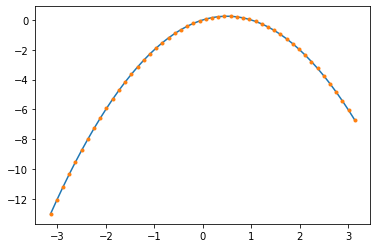

In [246]:
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
%matplotlib widget

x = np.linspace(-np.pi, np.pi, 50, endpoint=True)
y = x-x**2

plt.plot(x, y) # line plot
plt.plot(x, y, '.') # dot plot

plt.show()

In [ ]:
f,g = np.sin, np.cos
y = f(x)
z = g(x)

# customized!
plt.plot(x, y, color="green",
         linewidth=2.0,
         linestyle="--",
         label = r'$\sin(x)^2$') # line plot

plt.plot(x, z, color="red",
         linewidth=2.0,
         linestyle="-",
         label = r'$\cos(x)^2$') # line plot

# set the x and y limits
plt.xlim(-4.0, 4.0)
plt.ylim(-1.1, 1.1)

# change the tick marks
plt.yticks([-1, -1/2, 0,1/2,1])

# chane ticks with labels
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])

# add a vertical line
t = 2 * np.pi / 3
plt.plot([t, t], [g(t), f(t)], 
         color='blue', linewidth=2.0,
         linestyle=":")

# add some points using a scatter plot
plt.scatter([t,t],[f(t),g(t)], 30, color='red')

# add annotation 
plt.annotate(r'$\sin(\frac{2\pi}{3})$',
             xy=(t, g(t)), xycoords='data',
             xytext=(-60,-30), textcoords='offset points',
             arrowprops = dict(arrowstyle="->",
                               connectionstyle="arc3,rad=.4"))

# add a legend
plt.legend(loc='upper left')

plt.show()

In [ ]:
# we can do images too!
image = np.random.rand(50, 50)
plt.imshow(image, interpolation='nearest')   
plt.colorbar()
# we can save our work!
# format can be 'svg', 'pdf', 'png', etc
plt.savefig('random_color.eps', format='eps')
plt.show()

**Remark** Note that `pyplot.show()` will clear your drawing "canvas", so call `save` before calling `show`. There are also many other ways to save images.

In [ ]:
# return X and Y coordinates of points in a meshdrid with 0, 1 x-coords and 2,3 y-coords
X,Y = np.meshgrid(np.array([0,1]),np.array([2,3]))
print(X)
print(Y)

In [ ]:
# manually clear canvas
plt.clf()
N = 1000
axis_x = np.linspace(-1,1,N)
axis_y = np.linspace(-1,1,N)

X,Y = np.meshgrid(axis_x,axis_y)

def f(x,y) :
    return (np.exp(x + 1j * y)).imag

image = f(X,Y)

plt.imshow(image, extent=(-1,1,-1,1))    
plt.show()

**Remark** there are plenty of libraries for plotting complex functions, such as `mpmath`. Above, the color is just a third dimension. Other libraries use color for the imaginary part and brightness for magnitude.

### Subfigures

If you need to arrange several different charts in one place, you can use subfigures. Here is an example.

In [ ]:
# the 2 indicates take have the height, 
# the next 1 indicates take full width
# the last 1 indicates piece to choose
one = plt.subplot(2, 1, 1)
two = plt.subplot(2, 2, 3)
three = plt.subplot(2, 2, 4)
one.xaxis.set_major_locator(plt.NullLocator())
one.yaxis.set_major_locator(plt.NullLocator())

x = np.linspace(0.01,1,40)
one.plot(x,np.log(x))
two.plot(x, x**2)
three.plot(x,1+x)

plt.show()

## Other types of plots

`matplotlib` has many other different kinds of plots. You will explore these in the homework.

<img src="other_plots.png" >

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(x, y)
Z = (np.sin(X) + Y**2)

ax.plot_surface(X, Y, Z, 
                rstride=1, cstride=1, 
                cmap='coolwarm', linewidth=0.1)
plt.show()

## Plotting (3D) with Mayavi

You can use `matplotlib` for 3D plots for interactive plots, though it currently doesn't play well with `jupyter lab`, so it's not installed in the `Pipfile`. Here are some non-executable examples.

```python
import numpy as np
from mayavi import mlab

t = np.linspace(0, 20, 200)
mlab.plot3d(np.sin(t), np.cos(t), 0.1*t, t)
mlab.savefig('spiral.png')
```

<img src="spiral.png" >

```python
mlab.clf()
# mgrid is like mesh grid but in one line
# then 100j means divide in 100 steps insead
# of taking steps of size 100
X, Y = np.mgrid[-10:10:100j, -10:10:100j]
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)/R
mlab.surf(Z, warp_scale='auto')
mlab.savefig('surface.png')
```

<img src="surface.png" >

## Animations and GIFs

There are several tools for making animations, but the easiest one to use might be `moviepy`.

```python
import numpy as np
import  moviepy.editor as mpy

duration= 2 # duration of the animation in seconds (it will loop)

fig_myv = mlab.figure(size=(220,220), bgcolor=(1,1,1))

X, Y = np.mgrid[-2:2:200j, -2:2:200j]

Z = lambda p : np.sinc(X**2 + Y**2) + np.sin(X + p)

def make_frame(t):
    mlab.clf() # clear the figure (to reset the colors)
    mlab.mesh(Y, X, Z(2 * np.pi * t / duration), figure=fig_myv)
    return mlab.screenshot(antialiased=True)

animation = mpy.VideoClip(make_frame, duration=duration)
animation.write_gif("sinc.gif", fps=20)
mlab.close()
```

<img src="sinc.gif" >

In [ ]:
# import the game of life step evolution function
# from homework code
import numpy as np
from gof import evolution
import  moviepy.editor as mpy

board = np.random.randint(2, size=(30,30))
num_frames = 30
frames = []

for _ in range(num_frames) :
    board = evolution(board)
    frame = np.kron((1-board)*255.0, np.ones((10,10)))
    frame = np.repeat(frame[...,np.newaxis], 3, axis = 2)
    frames.append(frame)

animation = mpy.ImageSequenceClip(frames, fps=2, with_mask = False)
animation.write_gif('game_of_life.gif', verbose = False, logger = None)

<img src="game_of_life.gif" >